### Log-sum-exp problem
### $$ \min_x \log\sum_{i=1}^{M}\exp{(\langle a_i,x\rangle -b_i)}+\frac{\mu}{2}\vert\vert x\vert\vert^2 $$
### where $a_1, a_2, \cdots, a_m\in R^n$, $b_1, b_2, \cdots, b_m\in R$ and $\gamma>0$. We notice that the Lipschitz constant $L=$  

In [1]:
# First we import some useful packages. Don't import any other package.
import numpy as np
import matplotlib.pyplot as plt
import time as clock

### Initialization of the model

In [2]:
np.random.seed(114514)
A = np.random.uniform(-1,1,(500,200))
b = np.random.uniform(-1,1,(500,1))
x0 = 10*np.ones((200,1))#np.random.uniform(-1,1,(100,1)) #0.5

In [3]:
mu = 1

### Algorithm

In [4]:
L = 2*np.max(np.diag(A@A.T)) + mu
stepsize = 1/(2*L)
H = 2
Model = {'A':A, 'b':b, 'mu':mu,'x':x0,'Lip':L,'H':2};
options= {'stepsize':stepsize}

In [7]:
#Load 
from Mathtools import *
from gradNewton import *
from HBF import *
from CubicNewton import *
from CubicSR1 import *
from GradQN import *
from gd import *

In [8]:
#test
maxiter = 20000;
check = 1
tol = 1e-10;

# taping:
xs = [];
rs = [];
fs = [];
ts = [];
cols = [];
legs = [];

nams = [];

# colors for the image
COLSR1 = [(1,0,0,1), (1,0.5,0,1), (1,0,0.5,1), (0,0.5,0.5,1), (0.5,0.5,0,1) ]
COLBFGS =  [(0.3,0.7,0,1), (0.7,0.2,0.3,1), (0,0,0,1), (0.5,0,0.2,1), (0.2,0.2,0.7,1) ]

In [9]:
# turn algorithms to be run on or off
run_grad_SR1 = 1; #grad SR1 ad with safeguard

run_grad_Newton = 1;
run_Cubic_Newton = 1;
run_Cubic_SR1 = 1;

run_HBF = 1
run_gd =1
# with open('opt.npy', 'rb') as f:
#     opt= np.load(f)
compute_optimal_value = False;


if compute_optimal_value: # optimal solution is compyted using FISTA
    maxiter = 10000;
    check = 1000;
    
    run_fista = 0;
    run_grad_SR1_sf = 0; #grad SR1 ad
    run_gd = 1
    
    
    
    

In [10]:
#####################################################################
if run_Cubic_Newton:
    
    print('');
    print('********************************************************');
    print('***Cubic Newton **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = Cubic_Newton(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    fs.append(output['seq_fun']);
    cols.append((0.1,0.1,0.6,1));
    legs.append('Cubic Newton');
    nams.append('Cubic Newton');


********************************************************
***Cubic Newton **
***********
iter:1, funValue:10165.901986,fun:10165.901986
iter:2, funValue:9027.795414,fun:9027.795414
iter:3, funValue:7988.151266,fun:7988.151266
iter:4, funValue:7041.077907,fun:7041.077907
iter:5, funValue:6180.868220,fun:6180.868220
iter:6, funValue:5401.999509,fun:5401.999509
iter:7, funValue:4699.133397,fun:4699.133397
iter:8, funValue:4067.115901,fun:4067.115901
iter:9, funValue:3501.011120,fun:3501.011120
iter:10, funValue:2997.133763,fun:2997.133763
iter:11, funValue:2550.311717,fun:2550.311717
iter:12, funValue:2155.430115,fun:2155.430115
iter:13, funValue:1808.293424,fun:1808.293424
iter:14, funValue:1505.201932,fun:1505.201932
iter:15, funValue:1242.364413,fun:1242.364413
iter:16, funValue:1015.785147,fun:1015.785147
iter:17, funValue:822.023348,fun:822.023348
iter:18, funValue:657.750803,fun:657.750803
iter:19, funValue:519.691339,fun:519.691339
iter:20, funValue:404.850037,fun:404.850037
iter:2

In [11]:
#####################################################################
if run_grad_Newton:
    
    print('');
    print('********************************************************');
    print('***Grad Newton **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = grad_Newton(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    fs.append(output['seq_fun']);
    cols.append((0.1,0.1,0,1));
    legs.append('Grad Newton');
    nams.append('Grad Newton');


********************************************************
***Grad Newton **
***********
iter:1, funValue:10176.441658,fun:10176.441658
iter:2, funValue:9067.870895,fun:9067.870895
iter:3, funValue:8053.314316,fun:8053.314316
iter:4, funValue:7127.188597,fun:7127.188597
iter:5, funValue:6284.088812,fun:6284.088812
iter:6, funValue:5518.788144,fun:5518.788144
iter:7, funValue:4826.237576,fun:4826.237576
iter:8, funValue:4201.565629,fun:4201.565629
iter:9, funValue:3640.087859,fun:3640.087859
iter:10, funValue:3138.018149,fun:3138.018149
iter:11, funValue:2691.251845,fun:2691.251845
iter:12, funValue:2294.509138,fun:2294.509138
iter:13, funValue:1943.821070,fun:1943.821070
iter:14, funValue:1635.571060,fun:1635.571060
iter:15, funValue:1366.485358,fun:1366.485358
iter:16, funValue:1132.710268,fun:1132.710268
iter:17, funValue:930.897429,fun:930.897429
iter:18, funValue:758.050981,fun:758.050981
iter:19, funValue:611.072654,fun:611.072654
iter:20, funValue:487.117647,fun:487.117647
iter:21

In [12]:
#####################################################################
if run_Cubic_SR1:
    
    print('');
    print('********************************************************');
    print('***Cubic SR1 **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = Cubic_SR1(Model, options, tol, 800, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    fs.append(output['seq_fun']);
    cols.append((0.8,0.5,0.6,1));
    legs.append('Cubic SR1 PQN');
    nams.append('Cubic SR1 PQN');


********************************************************
***Cubic SR1 **
***********
iter:1, funValue:10165.901986,fun:10165.901986
iter:2, funValue:9136.094159,fun:9136.094159
iter:3, funValue:8657.077637,fun:8657.077637
iter:4, funValue:7992.092371,fun:7992.092371
iter:5, funValue:7466.294445,fun:7466.294445
iter:6, funValue:6920.365395,fun:6920.365395
iter:7, funValue:6427.110417,fun:6427.110417
iter:8, funValue:5950.285549,fun:5950.285549
iter:9, funValue:5505.413876,fun:5505.413876
iter:10, funValue:5083.634404,fun:5083.634404
iter:11, funValue:4687.633336,fun:4687.633336
iter:12, funValue:4314.686018,fun:4314.686018
iter:13, funValue:3964.646612,fun:3964.646612
iter:14, funValue:3636.195920,fun:3636.195920
iter:15, funValue:3328.757892,fun:3328.757892
iter:16, funValue:3042.739785,fun:3042.739785
iter:17, funValue:2778.266490,fun:2778.266490
iter:18, funValue:2530.450304,fun:2530.450304
iter:19, funValue:2299.757180,fun:2299.757180
iter:20, funValue:2085.007659,fun:2085.007659
i

In [13]:
#####################################################################
if run_grad_SR1:
    
    print('');
    print('********************************************************');
    print('***Gradient reg SR1 ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True        
    }

   
    
    output = Grad_SR1(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    fs.append(output['seq_fun']);
    cols.append((0.8,0.1,0,1));
    legs.append('Grad SR1 PQN');
    nams.append('Grad SR1 PQN');


********************************************************
***Gradient reg SR1 ***
***********
*****number of iterations***
1
iter:1, funValue:10164.566928,fun:10164.566928
iter:2, funValue:47.977754,fun:47.977754
iter:3, funValue:43.727370,fun:43.727370
iter:4, funValue:43.598137,fun:43.598137
iter:5, funValue:11.388932,fun:11.388932
iter:6, funValue:10.036999,fun:10.036999
iter:7, funValue:10.022838,fun:10.022838
iter:8, funValue:6.852642,fun:6.852642
iter:9, funValue:6.513189,fun:6.513189
iter:10, funValue:6.508087,fun:6.508087
iter:11, funValue:6.584143,fun:6.584143
iter:12, funValue:6.328924,fun:6.328924
iter:13, funValue:6.328676,fun:6.328676
iter:14, funValue:6.328983,fun:6.328983
iter:15, funValue:6.323528,fun:6.323528
iter:16, funValue:6.323518,fun:6.323518
iter:17, funValue:6.323500,fun:6.323500
iter:18, funValue:6.323384,fun:6.323384
iter:19, funValue:6.323384,fun:6.323384
iter:20, funValue:6.323381,fun:6.323381
iter:21, funValue:6.323381,fun:6.323381
iter:22, funValue:6.3233

In [14]:
if run_HBF:
    
    print('');
    print('********************************************************');
    print('***Accelerated ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'storeTime'     : True,
        
        'storeBeta' : False,
    }

   
    
    output = HBF(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    
    fs.append(output['seq_obj']);
    
    cols.append((0.4,0.5,0,1));
    legs.append('HBF');
    nams.append('HBF');


********************************************************
***Accelerated ***
***********
iter:1, time:1729091898.217953, tau:0.021114,fun:9859.552785
iter:2, time:1729091898.218743, tau:0.021114,fun:9092.525141
iter:3, time:1729091898.220080, tau:0.021114,fun:8093.747974
iter:4, time:1729091898.220700, tau:0.021114,fun:6963.902459
iter:5, time:1729091898.221350, tau:0.021114,fun:5792.490260
iter:6, time:1729091898.221939, tau:0.021114,fun:4653.041563
iter:7, time:1729091898.222515, tau:0.021114,fun:3600.992210
iter:8, time:1729091898.223316, tau:0.021114,fun:2678.599186
iter:9, time:1729091898.223885, tau:0.021114,fun:1904.029606
iter:10, time:1729091898.224257, tau:0.021114,fun:1278.978587
iter:11, time:1729091898.224640, tau:0.021114,fun:798.851805
iter:12, time:1729091898.225027, tau:0.021114,fun:455.114751
iter:13, time:1729091898.225421, tau:0.021114,fun:226.977387
iter:14, time:1729091898.225954, tau:0.021114,fun:91.991773
iter:15, time:1729091898.226695, tau:0.021114,fun:30.1717

In [16]:
if run_gd:
    
    print('');
    print('********************************************************');
    print('***Gradient  ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'storeTime'     : True,
        
        'storeBeta' : False,
    }

   
    
    output = gd(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    fs.append(output['seq_obj']);
    
    cols.append((0.4,0.2,0,1));
    legs.append('GD');
    nams.append('GD');


********************************************************
***Gradient  ***
***********
iter:1, time:1729091906.811431, tau:0.003069,fun:10227.644285
iter:2, time:1729091906.812809, tau:0.003069,fun:10164.760210
iter:3, time:1729091906.814147, tau:0.003069,fun:10102.261515
iter:4, time:1729091906.814866, tau:0.003069,fun:10040.145839
iter:5, time:1729091906.815425, tau:0.003069,fun:9978.410835
iter:6, time:1729091906.816513, tau:0.003069,fun:9917.054169
iter:7, time:1729091906.817108, tau:0.003069,fun:9856.073523
iter:8, time:1729091906.817645, tau:0.003069,fun:9795.466592
iter:9, time:1729091906.818105, tau:0.003069,fun:9735.231086
iter:10, time:1729091906.818567, tau:0.003069,fun:9675.364729
iter:11, time:1729091906.819328, tau:0.003069,fun:9615.865259
iter:12, time:1729091906.819645, tau:0.003069,fun:9556.730427
iter:13, time:1729091906.819942, tau:0.003069,fun:9497.957998
iter:14, time:1729091906.820250, tau:0.003069,fun:9439.545752
iter:15, time:1729091906.820865, tau:0.003069,fun:

iter:1086, time:1729091907.012119, tau:0.003069,fun:16.244868
iter:1087, time:1729091907.012241, tau:0.003069,fun:16.175439
iter:1088, time:1729091907.012349, tau:0.003069,fun:16.106476
iter:1089, time:1729091907.012462, tau:0.003069,fun:16.037976
iter:1090, time:1729091907.012556, tau:0.003069,fun:15.969937
iter:1091, time:1729091907.012651, tau:0.003069,fun:15.902355
iter:1092, time:1729091907.012751, tau:0.003069,fun:15.835228
iter:1093, time:1729091907.012853, tau:0.003069,fun:15.768552
iter:1094, time:1729091907.012992, tau:0.003069,fun:15.702326
iter:1095, time:1729091907.013093, tau:0.003069,fun:15.636545
iter:1096, time:1729091907.013195, tau:0.003069,fun:15.571207
iter:1097, time:1729091907.013298, tau:0.003069,fun:15.506309
iter:1098, time:1729091907.013403, tau:0.003069,fun:15.441849
iter:1099, time:1729091907.013499, tau:0.003069,fun:15.377823
iter:1100, time:1729091907.013696, tau:0.003069,fun:15.314230
iter:1101, time:1729091907.013801, tau:0.003069,fun:15.251065
iter:110

iter:1861, time:1729091907.214477, tau:0.003069,fun:6.358120
iter:1862, time:1729091907.214609, tau:0.003069,fun:6.357870
iter:1863, time:1729091907.214747, tau:0.003069,fun:6.357622
iter:1864, time:1729091907.214930, tau:0.003069,fun:6.357376
iter:1865, time:1729091907.215050, tau:0.003069,fun:6.357132
iter:1866, time:1729091907.215182, tau:0.003069,fun:6.356889
iter:1867, time:1729091907.215324, tau:0.003069,fun:6.356648
iter:1868, time:1729091907.215437, tau:0.003069,fun:6.356409
iter:1869, time:1729091907.215557, tau:0.003069,fun:6.356172
iter:1870, time:1729091907.215661, tau:0.003069,fun:6.355936
iter:1871, time:1729091907.215767, tau:0.003069,fun:6.355702
iter:1872, time:1729091907.215870, tau:0.003069,fun:6.355470
iter:1873, time:1729091907.215979, tau:0.003069,fun:6.355240
iter:1874, time:1729091907.216087, tau:0.003069,fun:6.355011
iter:1875, time:1729091907.216192, tau:0.003069,fun:6.354784
iter:1876, time:1729091907.216300, tau:0.003069,fun:6.354558
iter:1877, time:17290919

iter:2748, time:1729091907.415687, tau:0.003069,fun:6.323450
iter:2749, time:1729091907.416284, tau:0.003069,fun:6.323449
iter:2750, time:1729091907.416401, tau:0.003069,fun:6.323449
iter:2751, time:1729091907.416713, tau:0.003069,fun:6.323448
iter:2752, time:1729091907.416981, tau:0.003069,fun:6.323448
iter:2753, time:1729091907.417253, tau:0.003069,fun:6.323447
iter:2754, time:1729091907.417510, tau:0.003069,fun:6.323447
iter:2755, time:1729091907.417628, tau:0.003069,fun:6.323446
iter:2756, time:1729091907.417732, tau:0.003069,fun:6.323446
iter:2757, time:1729091907.417834, tau:0.003069,fun:6.323445
iter:2758, time:1729091907.417955, tau:0.003069,fun:6.323445
iter:2759, time:1729091907.418061, tau:0.003069,fun:6.323445
iter:2760, time:1729091907.418171, tau:0.003069,fun:6.323444
iter:2761, time:1729091907.418275, tau:0.003069,fun:6.323444
iter:2762, time:1729091907.418397, tau:0.003069,fun:6.323443
iter:2763, time:1729091907.418517, tau:0.003069,fun:6.323443
iter:2764, time:17290919

iter:3720, time:1729091907.594194, tau:0.003069,fun:6.323381
iter:3721, time:1729091907.629970, tau:0.003069,fun:6.323381
iter:3722, time:1729091907.630132, tau:0.003069,fun:6.323381
iter:3723, time:1729091907.630255, tau:0.003069,fun:6.323381
iter:3724, time:1729091907.630387, tau:0.003069,fun:6.323381
iter:3725, time:1729091907.630764, tau:0.003069,fun:6.323381
iter:3726, time:1729091907.630872, tau:0.003069,fun:6.323381
iter:3727, time:1729091907.630991, tau:0.003069,fun:6.323381
iter:3728, time:1729091907.631115, tau:0.003069,fun:6.323381
iter:3729, time:1729091907.631232, tau:0.003069,fun:6.323381
iter:3730, time:1729091907.631340, tau:0.003069,fun:6.323381
iter:3731, time:1729091907.631460, tau:0.003069,fun:6.323381
iter:3732, time:1729091907.631577, tau:0.003069,fun:6.323381
iter:3733, time:1729091907.631695, tau:0.003069,fun:6.323381
iter:3734, time:1729091907.631802, tau:0.003069,fun:6.323381
iter:3735, time:1729091907.631918, tau:0.003069,fun:6.323381
iter:3736, time:17290919

iter:4720, time:1729091907.848038, tau:0.003069,fun:6.323381
iter:4721, time:1729091907.848209, tau:0.003069,fun:6.323381
iter:4722, time:1729091907.848335, tau:0.003069,fun:6.323381
iter:4723, time:1729091907.848455, tau:0.003069,fun:6.323381
iter:4724, time:1729091907.848575, tau:0.003069,fun:6.323381
iter:4725, time:1729091907.848681, tau:0.003069,fun:6.323381
iter:4726, time:1729091907.849089, tau:0.003069,fun:6.323381
iter:4727, time:1729091907.849206, tau:0.003069,fun:6.323381
iter:4728, time:1729091907.849313, tau:0.003069,fun:6.323381
iter:4729, time:1729091907.849420, tau:0.003069,fun:6.323381
iter:4730, time:1729091907.849524, tau:0.003069,fun:6.323381
iter:4731, time:1729091907.849645, tau:0.003069,fun:6.323381
iter:4732, time:1729091907.849757, tau:0.003069,fun:6.323381
iter:4733, time:1729091907.849873, tau:0.003069,fun:6.323381
iter:4734, time:1729091907.849984, tau:0.003069,fun:6.323381
iter:4735, time:1729091907.850100, tau:0.003069,fun:6.323381
iter:4736, time:17290919

iter:5719, time:1729091908.034430, tau:0.003069,fun:6.323381
iter:5720, time:1729091908.060153, tau:0.003069,fun:6.323381
iter:5721, time:1729091908.060715, tau:0.003069,fun:6.323381
iter:5722, time:1729091908.060826, tau:0.003069,fun:6.323381
iter:5723, time:1729091908.060931, tau:0.003069,fun:6.323381
iter:5724, time:1729091908.061030, tau:0.003069,fun:6.323381
iter:5725, time:1729091908.061501, tau:0.003069,fun:6.323381
iter:5726, time:1729091908.062044, tau:0.003069,fun:6.323381
iter:5727, time:1729091908.062145, tau:0.003069,fun:6.323381
iter:5728, time:1729091908.062259, tau:0.003069,fun:6.323381
iter:5729, time:1729091908.062735, tau:0.003069,fun:6.323381
iter:5730, time:1729091908.063178, tau:0.003069,fun:6.323381
iter:5731, time:1729091908.063280, tau:0.003069,fun:6.323381
iter:5732, time:1729091908.063441, tau:0.003069,fun:6.323381
iter:5733, time:1729091908.063924, tau:0.003069,fun:6.323381
iter:5734, time:1729091908.064053, tau:0.003069,fun:6.323381
iter:5735, time:17290919

iter:6719, time:1729091908.277712, tau:0.003069,fun:6.323381
iter:6720, time:1729091908.277891, tau:0.003069,fun:6.323381
iter:6721, time:1729091908.278011, tau:0.003069,fun:6.323381
iter:6722, time:1729091908.278125, tau:0.003069,fun:6.323381
iter:6723, time:1729091908.278241, tau:0.003069,fun:6.323381
iter:6724, time:1729091908.286264, tau:0.003069,fun:6.323381
iter:6725, time:1729091908.286509, tau:0.003069,fun:6.323381
iter:6726, time:1729091908.286700, tau:0.003069,fun:6.323381
iter:6727, time:1729091908.286873, tau:0.003069,fun:6.323381
iter:6728, time:1729091908.287580, tau:0.003069,fun:6.323381
iter:6729, time:1729091908.287741, tau:0.003069,fun:6.323381
iter:6730, time:1729091908.288305, tau:0.003069,fun:6.323381
iter:6731, time:1729091908.288429, tau:0.003069,fun:6.323381
iter:6732, time:1729091908.288551, tau:0.003069,fun:6.323381
iter:6733, time:1729091908.288667, tau:0.003069,fun:6.323381
iter:6734, time:1729091908.289233, tau:0.003069,fun:6.323381
iter:6735, time:17290919

iter:7684, time:1729091908.478948, tau:0.003069,fun:6.323381
iter:7685, time:1729091908.479754, tau:0.003069,fun:6.323381
iter:7686, time:1729091908.479861, tau:0.003069,fun:6.323381
iter:7687, time:1729091908.479971, tau:0.003069,fun:6.323381
iter:7688, time:1729091908.480094, tau:0.003069,fun:6.323381
iter:7689, time:1729091908.480202, tau:0.003069,fun:6.323381
iter:7690, time:1729091908.480322, tau:0.003069,fun:6.323381
iter:7691, time:1729091908.480428, tau:0.003069,fun:6.323381
iter:7692, time:1729091908.480544, tau:0.003069,fun:6.323381
iter:7693, time:1729091908.480655, tau:0.003069,fun:6.323381
iter:7694, time:1729091908.480777, tau:0.003069,fun:6.323381
iter:7695, time:1729091908.480880, tau:0.003069,fun:6.323381
iter:7696, time:1729091908.480992, tau:0.003069,fun:6.323381
iter:7697, time:1729091908.481096, tau:0.003069,fun:6.323381
iter:7698, time:1729091908.481201, tau:0.003069,fun:6.323381
iter:7699, time:1729091908.481340, tau:0.003069,fun:6.323381
iter:7700, time:17290919

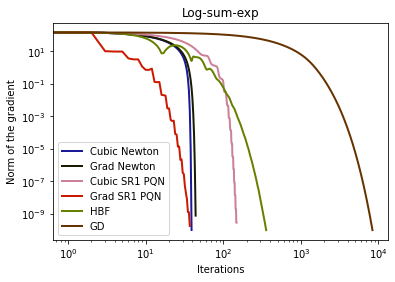

<Figure size 432x288 with 0 Axes>

In [17]:
nalgs = len(rs);
#nalgs = len(fs);

# plotting
fig1 = plt.figure();
# CX = np.arange(1,maxiter,1)
# logCY = np.log(10/(CX)**(1/2))*(maxiter/2)
# GX = np.arange(1,maxiter,1)
# logGY = np.log(10/(GX)**(1/4))*(maxiter/2)
for i in range(0,nalgs):
    iterations = np.arange(0,len(rs[i])-1,1)
    
    plt.plot(iterations, rs[i][0:-1], '-', color=cols[i], linewidth=2);
    #plt.plot(iterations,fs[i][1:-1], '-', color=cols[i], linewidth=2);
    
    
plt.legend(legs);
plt.yscale('log');


#plt.plot(CX, CY, '--', color='black', linewidth=2);
plt.xscale('log');

#plt.xlabel('seq_time')
plt.xlabel('Iterations')
plt.ylabel('Norm of the gradient');
plt.title('Log-sum-exp')
plt.savefig('AllalgorithmRegSr1LogSumExp(PQN2Oct16).pdf')

plt.show();
plt.draw();


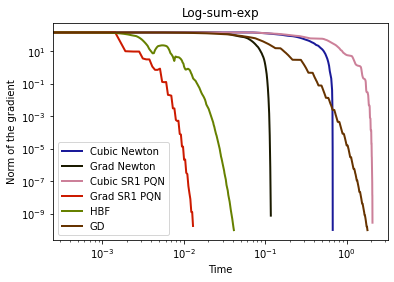

<Figure size 432x288 with 0 Axes>

In [18]:
nalgs = len(rs);
#nalgs = len(fs);

# plotting
fig1 = plt.figure();
for i in range(0,nalgs):
    plt.plot(ts[i][0:-1], rs[i][0:-1], '-', color=cols[i], linewidth=2);
    #plt.plot(iterations,fs[i][1:-1], '-', color=cols[i], linewidth=2);

plt.legend(legs);
plt.yscale('log');
plt.xscale('log');

plt.xlabel('Time')
#plt.xlabel('seq_iter')
plt.ylabel('Norm of the gradient');
plt.title('Log-sum-exp')
plt.savefig('AllalgorithmRegSr1LogSumExp(PQN)(timeOct16).pdf')

plt.show();
plt.draw();
